In [1]:
pip install pgmpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

In [3]:
import os

file_path = r"C:\Users\ADMIN\Downloads\Dataset for project students (4).xlsx"

if os.path.exists(file_path):
    data = pd.read_excel(file_path)
    print("File loaded successfully!")
else:
    print("File not found. Check the path.")

File loaded successfully!



 First 5 Rows of the Dataset:
     ID Visit    Age   Sex PD family history Polygenic risk score  \
0  3518    V01  69.1  Male               Yes                  Mid   
1  3656    V01  67.0  Male               Yes                   No   
2  3271    V01  50.7  Male                No                  Mid   
3  3270    V01  79.4  Male                No                  Yes   
4  3269    V01  84.7  Male               Yes                  Nil   

  GBA mutation SN hyperechogenicity pesticide exposure solvent exposure  \
0           No             Positive                Yes               No   
1          Yes             Negative                 No              Yes   
2           No                  Nil                Yes               No   
3          Yes             Positive                 No              Yes   
4           No             Negative                Yes               No   

  diabetes non-physical activity non-smoking hyposima constipation  \
0       No                   Yes 

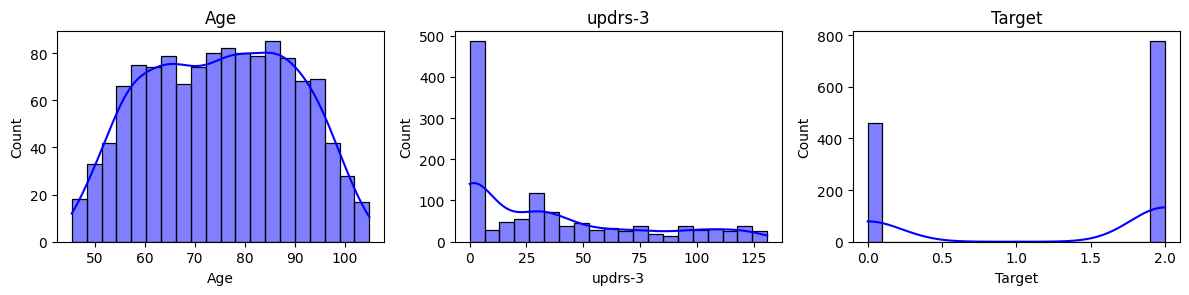

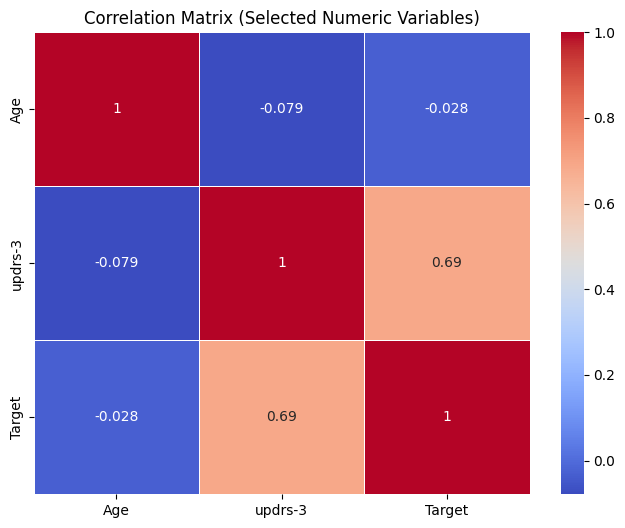

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  

# Display first few rows
print("\n First 5 Rows of the Dataset:")
print(data.head())

# Dataset Info
print("\n Dataset Info:")
print(data.info())

# Check Data Types
print("\n Column Data Types:")
print(data.dtypes)

# Manually Select Numeric Columns (Exclude ID & Categorical Columns)
numeric_cols = [
    'Age', 'updrs-3', 'Target'  # Add more numeric columns if applicable
]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols[:9]):  # Limit to 9 subplots for better visualization
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], bins=20, kde=True, color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

# Compute correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Selected Numeric Variables)")
plt.show()

In [5]:
data.columns = data.columns.str.strip()

print(" Updated Column Names:", data.columns)

 Updated Column Names: Index(['ID', 'Visit', 'Age', 'Sex', 'PD family history',
       'Polygenic risk score', 'GBA mutation', 'SN hyperechogenicity',
       'pesticide exposure', 'solvent exposure', 'diabetes',
       'non-physical activity', 'non-smoking', 'hyposima', 'constipation',
       'dysfunction', 'updrs-3', 'depression', 'cognitive deficits', 'Target'],
      dtype='object')


In [6]:
# Discretize age into categories
data['Age_Category'] = pd.cut(data['Age'], bins=[0, 65, 110], labels=["≤65", ">65"])

data = data.drop(columns=['Age'])

print("\n First 5 Rows After Discretizing Age:")
print(data.head())

print("\n Value Counts for Age Categories:")
print(data['Age_Category'].value_counts())


 First 5 Rows After Discretizing Age:
     ID Visit   Sex PD family history Polygenic risk score GBA mutation  \
0  3518   V01  Male               Yes                  Mid           No   
1  3656   V01  Male               Yes                   No          Yes   
2  3271   V01  Male                No                  Mid           No   
3  3270   V01  Male                No                  Yes          Yes   
4  3269   V01  Male               Yes                  Nil           No   

  SN hyperechogenicity pesticide exposure solvent exposure diabetes  \
0             Positive                Yes               No       No   
1             Negative                 No              Yes      Yes   
2                  Nil                Yes               No      Nil   
3             Positive                 No              Yes       No   
4             Negative                Yes               No      Yes   

  non-physical activity non-smoking hyposima constipation dysfunction  \
0         

In [7]:
import pandas as pd

data['UPDRS_Category'] = pd.cut(data['updrs-3'],
                                bins=[0, 3, 6, float('inf')],
                                labels=[0, 1, 2],
                                right=False)
#Drop the updrs-3 category 
data=data.drop(["updrs-3"], axis=1)


In [8]:
print(data['UPDRS_Category'].value_counts())

UPDRS_Category
2    757
0    468
1     11
Name: count, dtype: int64


In [9]:
data.isna().sum()

ID                       0
Visit                    0
Sex                      0
PD family history        0
Polygenic risk score     0
GBA mutation             0
SN hyperechogenicity     0
pesticide exposure       0
solvent exposure         0
diabetes                 0
non-physical activity    0
non-smoking              0
hyposima                 0
constipation             0
dysfunction              1
depression               0
cognitive deficits       0
Target                   0
Age_Category             0
UPDRS_Category           0
dtype: int64

In [10]:

categorical_cols = ['Sex', 'PD family history', 'Polygenic risk score', 'GBA mutation',
                    'SN hyperechogenicity', 'pesticide exposure', 'solvent exposure',
                    'diabetes', 'non-physical activity', 'non-smoking', 'hyposima',
                    'constipation', 'dysfunction', 'depression', 'cognitive deficits']

for col in categorical_cols:
    print(f"\n Value Counts for {col}:")
    print(data[col].value_counts())


 Value Counts for Sex:
Sex
Female    640
Male      596
Name: count, dtype: int64

 Value Counts for PD family history:
PD family history
No     664
Yes    572
Name: count, dtype: int64

 Value Counts for Polygenic risk score:
Polygenic risk score
Nil    318
No     312
Mid    309
Yes    297
Name: count, dtype: int64

 Value Counts for GBA mutation:
GBA mutation
No     652
Yes    584
Name: count, dtype: int64

 Value Counts for SN hyperechogenicity:
SN hyperechogenicity
Positive    532
Negative    458
Nil         246
Name: count, dtype: int64

 Value Counts for pesticide exposure:
pesticide exposure
Yes    652
No     584
Name: count, dtype: int64

 Value Counts for solvent exposure:
solvent exposure
Yes    666
No     570
Name: count, dtype: int64

 Value Counts for diabetes:
diabetes
Yes    557
No     465
Nil    214
Name: count, dtype: int64

 Value Counts for non-physical activity:
non-physical activity
Yes    620
No     616
Name: count, dtype: int64

 Value Counts for non-smoking:
non

In [11]:
import numpy as np

cols_with_nil = ['Polygenic risk score', 'SN hyperechogenicity', 'diabetes',
                 'non-smoking', 'hyposima', 'constipation', 'dysfunction', 'depression']

data[cols_with_nil] = data[cols_with_nil].replace("Nil", np.nan) 

data['dysfunction'] = data['dysfunction'].replace({"no": "No"}) 
data['cognitive deficits'] = data['cognitive deficits'].replace({"yes": "Yes", "no": "No"}) 

data['dysfunction'] = data['dysfunction'].replace("", np.nan)
data['Age_Category'] = data['Age_Category'].replace("", np.nan) 

print("\n Missing Values After Replacing 'Nil' with NaN:")
print(data.isnull().sum()) 


 Missing Values After Replacing 'Nil' with NaN:
ID                         0
Visit                      0
Sex                        0
PD family history          0
Polygenic risk score     318
GBA mutation               0
SN hyperechogenicity     246
pesticide exposure         0
solvent exposure           0
diabetes                 214
non-physical activity      0
non-smoking              236
hyposima                 304
constipation             323
dysfunction              318
depression               223
cognitive deficits         0
Target                     0
Age_Category               0
UPDRS_Category             0
dtype: int64


In [12]:

categorical_cols = ['Sex', 'PD family history', 'Polygenic risk score', 'GBA mutation',
                    'SN hyperechogenicity', 'pesticide exposure', 'solvent exposure',
                    'diabetes', 'non-physical activity', 'non-smoking', 'hyposima',
                    'constipation', 'dysfunction', 'depression', 'cognitive deficits']

for col in categorical_cols:
    print(f"\n Value Counts for {col}:")
    print(data[col].value_counts())


 Value Counts for Sex:
Sex
Female    640
Male      596
Name: count, dtype: int64

 Value Counts for PD family history:
PD family history
No     664
Yes    572
Name: count, dtype: int64

 Value Counts for Polygenic risk score:
Polygenic risk score
No     312
Mid    309
Yes    297
Name: count, dtype: int64

 Value Counts for GBA mutation:
GBA mutation
No     652
Yes    584
Name: count, dtype: int64

 Value Counts for SN hyperechogenicity:
SN hyperechogenicity
Positive    532
Negative    458
Name: count, dtype: int64

 Value Counts for pesticide exposure:
pesticide exposure
Yes    652
No     584
Name: count, dtype: int64

 Value Counts for solvent exposure:
solvent exposure
Yes    666
No     570
Name: count, dtype: int64

 Value Counts for diabetes:
diabetes
Yes    557
No     465
Name: count, dtype: int64

 Value Counts for non-physical activity:
non-physical activity
Yes    620
No     616
Name: count, dtype: int64

 Value Counts for non-smoking:
non-smoking
No     508
Yes    492
Name: c

In [13]:
# Install Missforest
!pip install missingno scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
print(data.columns.tolist())
data.head()


['ID', 'Visit', 'Sex', 'PD family history', 'Polygenic risk score', 'GBA mutation', 'SN hyperechogenicity', 'pesticide exposure', 'solvent exposure', 'diabetes', 'non-physical activity', 'non-smoking', 'hyposima', 'constipation', 'dysfunction', 'depression', 'cognitive deficits', 'Target', 'Age_Category', 'UPDRS_Category']


,ID,Visit,Sex,PD family history,Polygenic risk score,GBA mutation,SN hyperechogenicity,pesticide exposure,solvent exposure,diabetes,non-physical activity,non-smoking,hyposima,constipation,dysfunction,depression,cognitive deficits,Target,Age_Category,UPDRS_Category
0,3518,V01,Male,Yes,Mid,No,Positive,Yes,No,No,Yes,No,Mid,Mid,No,No,No,0,>65,0
1,3656,V01,Male,Yes,No,Yes,Negative,No,Yes,Yes,No,Yes,Mid,NaN,No,Yes,No,0,>65,0
2,3271,V01,Male,No,Mid,No,NaN,Yes,No,NaN,No,NaN,NaN,NaN,No,No,Yes,0,≤65,0
3,3270,V01,Male,No,Yes,Yes,Positive,No,Yes,No,Yes,No,NaN,Mid,NaN,NaN,No,0,>65,0
4,3269,V01,Male,Yes,NaN,No,Negative,Yes,No,Yes,No,Yes,Mid,Mid,Yes,Yes,Yes,0,>65,0


In [15]:
df=data.copy()

In [16]:
# Check for duplicate 
duplicates = df[df.duplicated(subset=["ID", "Visit"], keep=False)]
if not duplicates.empty:
    print("ERROR: Duplicate (ID, Visit) pairs found! Listing them now:")
    print(duplicates.sort_values(by=["ID", "Visit"]))
    print(" Unique Visit values:", df["Visit"].unique())
    print("Total duplicate rows:", len(duplicates))


ERROR: Duplicate (ID, Visit) pairs found! Listing them now:
        ID Visit     Sex PD family history Polygenic risk score GBA mutation  \
179   3002   V01    Male                No                  NaN           No   
182   3002   V01  Female                No                   No          Yes   
488   3002   V02    Male                No                  Yes           No   
491   3002   V02  Female                No                   No           No   
797   3002   V03    Male                No                  Yes          Yes   
...    ...   ...     ...               ...                  ...          ...   
476   3269   V02  Female                No                  Mid          Yes   
622   3269   V03    Male               Yes                  Mid          Yes   
785   3269   V03  Female                No                  Yes           No   
931   3269   V04    Male               Yes                  Mid          Yes   
1094  3269   V04  Female                No                  

In [17]:

duplicate_ids = df[df.duplicated(subset=["ID", "Visit"], keep=False)]["ID"].unique()

print("\n Duplicate IDs That Appear More Than Once for the Same Visit:")
print(duplicate_ids)



 Duplicate IDs That Appear More Than Once for the Same Visit:
[3269 3004 3105 3006 3125 3174 3116 3122 3224 3207 3233 3025 3081 3013
 3011 3221 3003 3002]


In [18]:

df = df[~df["ID"].isin(duplicate_ids)]

print("\nRemoved All Records of Duplicate IDs!")
print("Remaining Data Shape:", df.shape)



Removed All Records of Duplicate IDs!
Remaining Data Shape: (1084, 20)


In [19]:

duplicates = df[df.duplicated(subset=["ID", "Visit"], keep=False)]
if not duplicates.empty:
    print(" ERROR: Duplicate (ID, Visit) pairs found! Listing them now:")
    print(duplicates.sort_values(by=["ID", "Visit"]))
    print(" Unique Visit values:", df["Visit"].unique())
    print(" Total duplicate rows:", len(duplicates))
else:
    print("No duplicates")
   


No duplicates


In [20]:

non_varying_columns = []

exclude_columns = ['ID', 'Visit']

for col in df.columns:
    if col in exclude_columns:
        continue

    max_unique_per_id = df.groupby("ID")[col].nunique().max()
    
    if max_unique_per_id == 1:
        non_varying_columns.append(col)
print(" Columns that are constant across visits (V01–V04) for every patient:")
print(non_varying_columns)


 Columns that are constant across visits (V01–V04) for every patient:
['Sex', 'PD family history', 'Target']


In [21]:
import pandas as pd


static_features = ["Sex","PD family history"]
target_feature = "Target" 

# Expand into V1, V2, V3, V4
time_features = [col for col in df.columns if col not in ["ID", "Visit"] + static_features + [target_feature]]
df_static = df[df["Visit"] == "V01"][["ID"] + static_features]


df_target = df[df["Visit"] == "V04"][["ID", target_feature]]

df_pivot = df.pivot(index="ID", columns="Visit", values=time_features)

df_pivot.columns = [f"{col[0]}_{col[1]}" for col in df_pivot.columns]

df_pivot = df_pivot.reset_index()
df_final = df_static.merge(df_target, on="ID", how="left").merge(df_pivot, on="ID", how="left")

print(" Final Transformed DataFrame (Static Features Kept from Visit 1, Target from Visit 4 ):")
print(df_final.head())


 Final Transformed DataFrame (Static Features Kept from Visit 1, Target from Visit 4 ):
     ID     Sex PD family history  Target Polygenic risk score_V01  \
0  3518    Male               Yes       0                      Mid   
1  3656    Male               Yes       0                       No   
2  3271    Male                No       0                      Mid   
3  3270    Male                No       0                      Yes   
4  3072  Female                No       0                      Mid   

  Polygenic risk score_V02 Polygenic risk score_V03 Polygenic risk score_V04  \
0                      Mid                       No                      NaN   
1                      Yes                       No                      Mid   
2                      NaN                      NaN                      Mid   
3                      NaN                      Mid                      Mid   
4                      Mid                      Yes                       No   

  GBA muta

In [22]:
data = df_final.copy() 

data.head()


,ID,Sex,PD family history,Target,Polygenic risk score_V01,Polygenic risk score_V02,Polygenic risk score_V03,Polygenic risk score_V04,GBA mutation_V01,GBA mutation_V02,...,cognitive deficits_V03,cognitive deficits_V04,Age_Category_V01,Age_Category_V02,Age_Category_V03,Age_Category_V04,UPDRS_Category_V01,UPDRS_Category_V02,UPDRS_Category_V03,UPDRS_Category_V04
0,3518,Male,Yes,0,Mid,Mid,No,NaN,No,No,...,Yes,Yes,>65,>65,>65,>65,0,0,0,0
1,3656,Male,Yes,0,No,Yes,No,Mid,Yes,No,...,No,No,>65,>65,>65,>65,0,0,0,0
2,3271,Male,No,0,Mid,NaN,NaN,Mid,No,Yes,...,Yes,Yes,≤65,≤65,≤65,≤65,0,0,0,0
3,3270,Male,No,0,Yes,NaN,Mid,Mid,Yes,No,...,Yes,Yes,>65,>65,>65,>65,0,0,0,0
4,3072,Female,No,0,Mid,Mid,Yes,No,Yes,No,...,Yes,Yes,>65,>65,>65,>65,0,0,0,0


In [23]:

df_cleaned = data.drop(columns=[col for col in data.columns if "_missing" in col])

print("\nSuccessfully Removed '_missing' and '_missing_missing' Columns!")
print(" Remaining Columns:", df_cleaned.columns)



Successfully Removed '_missing' and '_missing_missing' Columns!
 Remaining Columns: Index(['ID', 'Sex', 'PD family history', 'Target', 'Polygenic risk score_V01',
       'Polygenic risk score_V02', 'Polygenic risk score_V03',
       'Polygenic risk score_V04', 'GBA mutation_V01', 'GBA mutation_V02',
       'GBA mutation_V03', 'GBA mutation_V04', 'SN hyperechogenicity_V01',
       'SN hyperechogenicity_V02', 'SN hyperechogenicity_V03',
       'SN hyperechogenicity_V04', 'pesticide exposure_V01',
       'pesticide exposure_V02', 'pesticide exposure_V03',
       'pesticide exposure_V04', 'solvent exposure_V01',
       'solvent exposure_V02', 'solvent exposure_V03', 'solvent exposure_V04',
       'diabetes_V01', 'diabetes_V02', 'diabetes_V03', 'diabetes_V04',
       'non-physical activity_V01', 'non-physical activity_V02',
       'non-physical activity_V03', 'non-physical activity_V04',
       'non-smoking_V01', 'non-smoking_V02', 'non-smoking_V03',
       'non-smoking_V04', 'hyposima_V01

In [24]:
df_cleaned.head()


,ID,Sex,PD family history,Target,Polygenic risk score_V01,Polygenic risk score_V02,Polygenic risk score_V03,Polygenic risk score_V04,GBA mutation_V01,GBA mutation_V02,...,cognitive deficits_V03,cognitive deficits_V04,Age_Category_V01,Age_Category_V02,Age_Category_V03,Age_Category_V04,UPDRS_Category_V01,UPDRS_Category_V02,UPDRS_Category_V03,UPDRS_Category_V04
0,3518,Male,Yes,0,Mid,Mid,No,NaN,No,No,...,Yes,Yes,>65,>65,>65,>65,0,0,0,0
1,3656,Male,Yes,0,No,Yes,No,Mid,Yes,No,...,No,No,>65,>65,>65,>65,0,0,0,0
2,3271,Male,No,0,Mid,NaN,NaN,Mid,No,Yes,...,Yes,Yes,≤65,≤65,≤65,≤65,0,0,0,0
3,3270,Male,No,0,Yes,NaN,Mid,Mid,Yes,No,...,Yes,Yes,>65,>65,>65,>65,0,0,0,0
4,3072,Female,No,0,Mid,Mid,Yes,No,Yes,No,...,Yes,Yes,>65,>65,>65,>65,0,0,0,0


In [25]:
# Create auxiliary missing indicators for MNAR
for col in df_cleaned.columns:
    df_cleaned[col + "_missing"] = df_cleaned[col].isnull().astype(int)

print("\n Created Auxiliary Missing Indicators!")
df_cleaned.head()



 Created Auxiliary Missing Indicators!


,ID,Sex,PD family history,Target,Polygenic risk score_V01,Polygenic risk score_V02,Polygenic risk score_V03,Polygenic risk score_V04,GBA mutation_V01,GBA mutation_V02,...,cognitive deficits_V03_missing,cognitive deficits_V04_missing,Age_Category_V01_missing,Age_Category_V02_missing,Age_Category_V03_missing,Age_Category_V04_missing,UPDRS_Category_V01_missing,UPDRS_Category_V02_missing,UPDRS_Category_V03_missing,UPDRS_Category_V04_missing
0,3518,Male,Yes,0,Mid,Mid,No,NaN,No,No,...,0,0,0,0,0,0,0,0,0,0
1,3656,Male,Yes,0,No,Yes,No,Mid,Yes,No,...,0,0,0,0,0,0,0,0,0,0
2,3271,Male,No,0,Mid,NaN,NaN,Mid,No,Yes,...,0,0,0,0,0,0,0,0,0,0
3,3270,Male,No,0,Yes,NaN,Mid,Mid,Yes,No,...,0,0,0,0,0,0,0,0,0,0
4,3072,Female,No,0,Mid,Mid,Yes,No,Yes,No,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data=df_cleaned.copy()

In [27]:
from sklearn.preprocessing import LabelEncoder

df_encoded = data.copy()

categorical_cols = df_encoded.select_dtypes(include=["object"]).columns.tolist()

df_encoded[categorical_cols] = df_encoded[categorical_cols].astype(str).apply(lambda x: x.str.strip())

le_dict = {} 
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col]) 
    le_dict[col] = le  

print("\n Successfully Converted ALL Categorical Features to Numeric!")



 Successfully Converted ALL Categorical Features to Numeric!


In [28]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("\n Checking Data Types After Encoding:")
print(df_encoded.dtypes)



 Checking Data Types After Encoding:
ID                                   int64
Sex                                  int32
PD family history                    int32
Target                               int64
Polygenic risk score_V01             int32
Polygenic risk score_V02             int32
Polygenic risk score_V03             int32
Polygenic risk score_V04             int32
GBA mutation_V01                     int32
GBA mutation_V02                     int32
GBA mutation_V03                     int32
GBA mutation_V04                     int32
SN hyperechogenicity_V01             int32
SN hyperechogenicity_V02             int32
SN hyperechogenicity_V03             int32
SN hyperechogenicity_V04             int32
pesticide exposure_V01               int32
pesticide exposure_V02               int32
pesticide exposure_V03               int32
pesticide exposure_V04               int32
solvent exposure_V01                 int32
solvent exposure_V02                 int32
solvent exposure

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier
#define feature
static_features = ["Sex", "PD family history"]
time_dependent_features = [col for col in df_encoded.columns if "_V" in col]  # Only V1, V2, V3, V4 features

#impute statistic feature
most_frequent_imputer = SimpleImputer(strategy="most_frequent")
df_encoded[static_features] = most_frequent_imputer.fit_transform(df_encoded[static_features])

print("\n Imputed Static Features Using Most Frequent Label!")

# apply missforest
missforest_imputer = IterativeImputer(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
)
df_encoded[time_dependent_features] = missforest_imputer.fit_transform(df_encoded[time_dependent_features])

df_encoded[time_dependent_features] = df_encoded[time_dependent_features].round().astype(int)

print("\n Successfully Imputed Longitudinal Features Using MissForest with Classifier!")



print("\n Final Imputed Dataset Ready for Bayesian Network Learning!")



 Imputed Static Features Using Most Frequent Label!

 Successfully Imputed Longitudinal Features Using MissForest with Classifier!

 Final Imputed Dataset Ready for Bayesian Network Learning!


In [30]:
#trying to clip extra values created from missforest imputation 
features_with_2_categories = [
    'Sex', 'PD family history', 'GBA mutation_V01', 'GBA mutation_V02','GBA mutation_V03', 'GBA mutation_V04',
    'SN hyperechogenicity_V01', 'SN hyperechogenicity_V02', 'SN hyperechogenicity_V03', 'SN hyperechogenicity_V04',
    'pesticide exposure_V01', 'pesticide exposure_V02', 'pesticide exposure_V03', 'pesticide exposure_V04',
    'solvent exposure_V01', 'solvent exposure_V02', 'solvent exposure_V03', 'solvent exposure_V04',
    'diabetes_V01', 'diabetes_V02', 'diabetes_V03', 'diabetes_V04',
    'non-physical activity_V01', 'non-physical activity_V02', 'non-physical activity_V03', 'non-physical activity_V04',
    'non-smoking_V01', 'non-smoking_V02', 'non-smoking_V03', 'non-smoking_V04',
    'depression_V01', 'depression_V02', 'depression_V03', 'depression_V04',
    'cognitive deficits_V01', 'cognitive deficits_V02', 'cognitive deficits_V03', 'cognitive deficits_V04',
    'Age_Category_V01', 'Age_Category_V02', 'Age_Category_V03', 'Age_Category_V04'
]

#  Features with 3 valid classes
features_with_3_categories = [
    'Polygenic risk score_V01', 'Polygenic risk score_V02', 'Polygenic risk score_V03', 'Polygenic risk score_V04', 
    'hyposima_V01', 'hyposima_V02', 'hyposima_V03', 'hyposima_V04',
    'constipation_V01', 'constipation_V02', 'constipation_V03', 'constipation_V04',
    'dysfunction_V01', 'dysfunction_V02', 'dysfunction_V03', 'dysfunction_V04',
    'UPDRS_Category_V01', 'UPDRS_Category_V02', 'UPDRS_Category_V03', 'UPDRS_Category_V04' 
]

# Combine all
all_categorical_features = features_with_2_categories + features_with_3_categories

#  convert to int
df_encoded[all_categorical_features] = df_encoded[all_categorical_features].round().astype(int)

# post-process values to valid ranges
for col in features_with_2_categories:
    valid_classes = [0, 1]
    df_encoded[col] = df_encoded[col].apply(
        lambda x: x if x in valid_classes else min(valid_classes, key=lambda v: abs(v - x))
    )

for col in features_with_3_categories:
    valid_classes = [0, 1, 2]
    df_encoded[col] = df_encoded[col].apply(
        lambda x: x if x in valid_classes else min(valid_classes, key=lambda v: abs(v - x))
    )
df_final_imputed = df_encoded.copy()


In [31]:
import pandas as pd

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
print(df_final_imputed.isnull().sum()) 

ID                                   0
Sex                                  0
PD family history                    0
Target                               0
Polygenic risk score_V01             0
Polygenic risk score_V02             0
Polygenic risk score_V03             0
Polygenic risk score_V04             0
GBA mutation_V01                     0
GBA mutation_V02                     0
GBA mutation_V03                     0
GBA mutation_V04                     0
SN hyperechogenicity_V01             0
SN hyperechogenicity_V02             0
SN hyperechogenicity_V03             0
SN hyperechogenicity_V04             0
pesticide exposure_V01               0
pesticide exposure_V02               0
pesticide exposure_V03               0
pesticide exposure_V04               0
solvent exposure_V01                 0
solvent exposure_V02                 0
solvent exposure_V03                 0
solvent exposure_V04                 0
diabetes_V01                         0
diabetes_V02             

In [32]:
data=df_final_imputed.copy()

In [33]:
print("\n Total Rows in Dataset:", df_final_imputed.shape[0])



 Total Rows in Dataset: 271


In [34]:
# common "Missing Data Flag"
data['Missing_Data_Flag'] = data.isnull().any(axis=1).astype(int)

print("\n Created Common Missing Feature for BN!")
print(data['Missing_Data_Flag'].value_counts())



 Created Common Missing Feature for BN!
Missing_Data_Flag
0    271
Name: count, dtype: int64


In [35]:
# Install bnlearn 
!pip install bnlearn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import KFold

In [37]:
data = data.copy()

In [38]:
data.drop(columns=[col for col in data.columns if '_missing' in col], inplace=True)


In [39]:
data.drop(columns=['Missing_Data_Flag'], inplace=True)  


In [40]:
data.head()

,ID,Sex,PD family history,Target,Polygenic risk score_V01,Polygenic risk score_V02,Polygenic risk score_V03,Polygenic risk score_V04,GBA mutation_V01,GBA mutation_V02,GBA mutation_V03,GBA mutation_V04,SN hyperechogenicity_V01,SN hyperechogenicity_V02,SN hyperechogenicity_V03,SN hyperechogenicity_V04,pesticide exposure_V01,pesticide exposure_V02,pesticide exposure_V03,pesticide exposure_V04,solvent exposure_V01,solvent exposure_V02,solvent exposure_V03,solvent exposure_V04,diabetes_V01,diabetes_V02,diabetes_V03,diabetes_V04,non-physical activity_V01,non-physical activity_V02,non-physical activity_V03,non-physical activity_V04,non-smoking_V01,non-smoking_V02,non-smoking_V03,non-smoking_V04,hyposima_V01,hyposima_V02,hyposima_V03,hyposima_V04,constipation_V01,constipation_V02,constipation_V03,constipation_V04,dysfunction_V01,dysfunction_V02,dysfunction_V03,dysfunction_V04,depression_V01,depression_V02,depression_V03,depression_V04,cognitive deficits_V01,cognitive deficits_V02,cognitive deficits_V03,cognitive deficits_V04,Age_Category_V01,Age_Category_V02,Age_Category_V03,Age_Category_V04,UPDRS_Category_V01,UPDRS_Category_V02,UPDRS_Category_V03,UPDRS_Category_V04
0,3518,1,1,0,0,0,1,2,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,2,2,1,0,1,2,1,1,2,2,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0
1,3656,1,1,0,1,2,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,2,1,2,2,1,2,2,1,2,0,2,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3271,1,0,0,0,2,2,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2,1,1,2,2,1,2,0,1,2,0,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0
3,3270,1,0,0,2,2,0,0,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,2,1,1,2,0,2,1,2,2,1,1,2,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0
4,3072,0,0,0,0,0,2,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,2,2,2,2,0,2,2,0,2,2,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [41]:
hc = HillClimbSearch(data)
bn_learned = hc.estimate(scoring_method=BicScore(data), max_indegree=3)  # Constrain indegree


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [42]:
bootstrap_samples = 1000
edges_count = {}
all_edges = []  
edges_above_50 = []  # to store edges with frequency >0.5

# bootstrap sampling 
for i in range(bootstrap_samples):
    data_sample = data.sample(frac=1, replace=True) 
    bn_sample = hc.estimate(scoring_method=BicScore(data_sample))

    for edge in bn_sample.edges():
        all_edges.append(edge)
        edges_count[edge] = edges_count.get(edge, 0) + 1

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

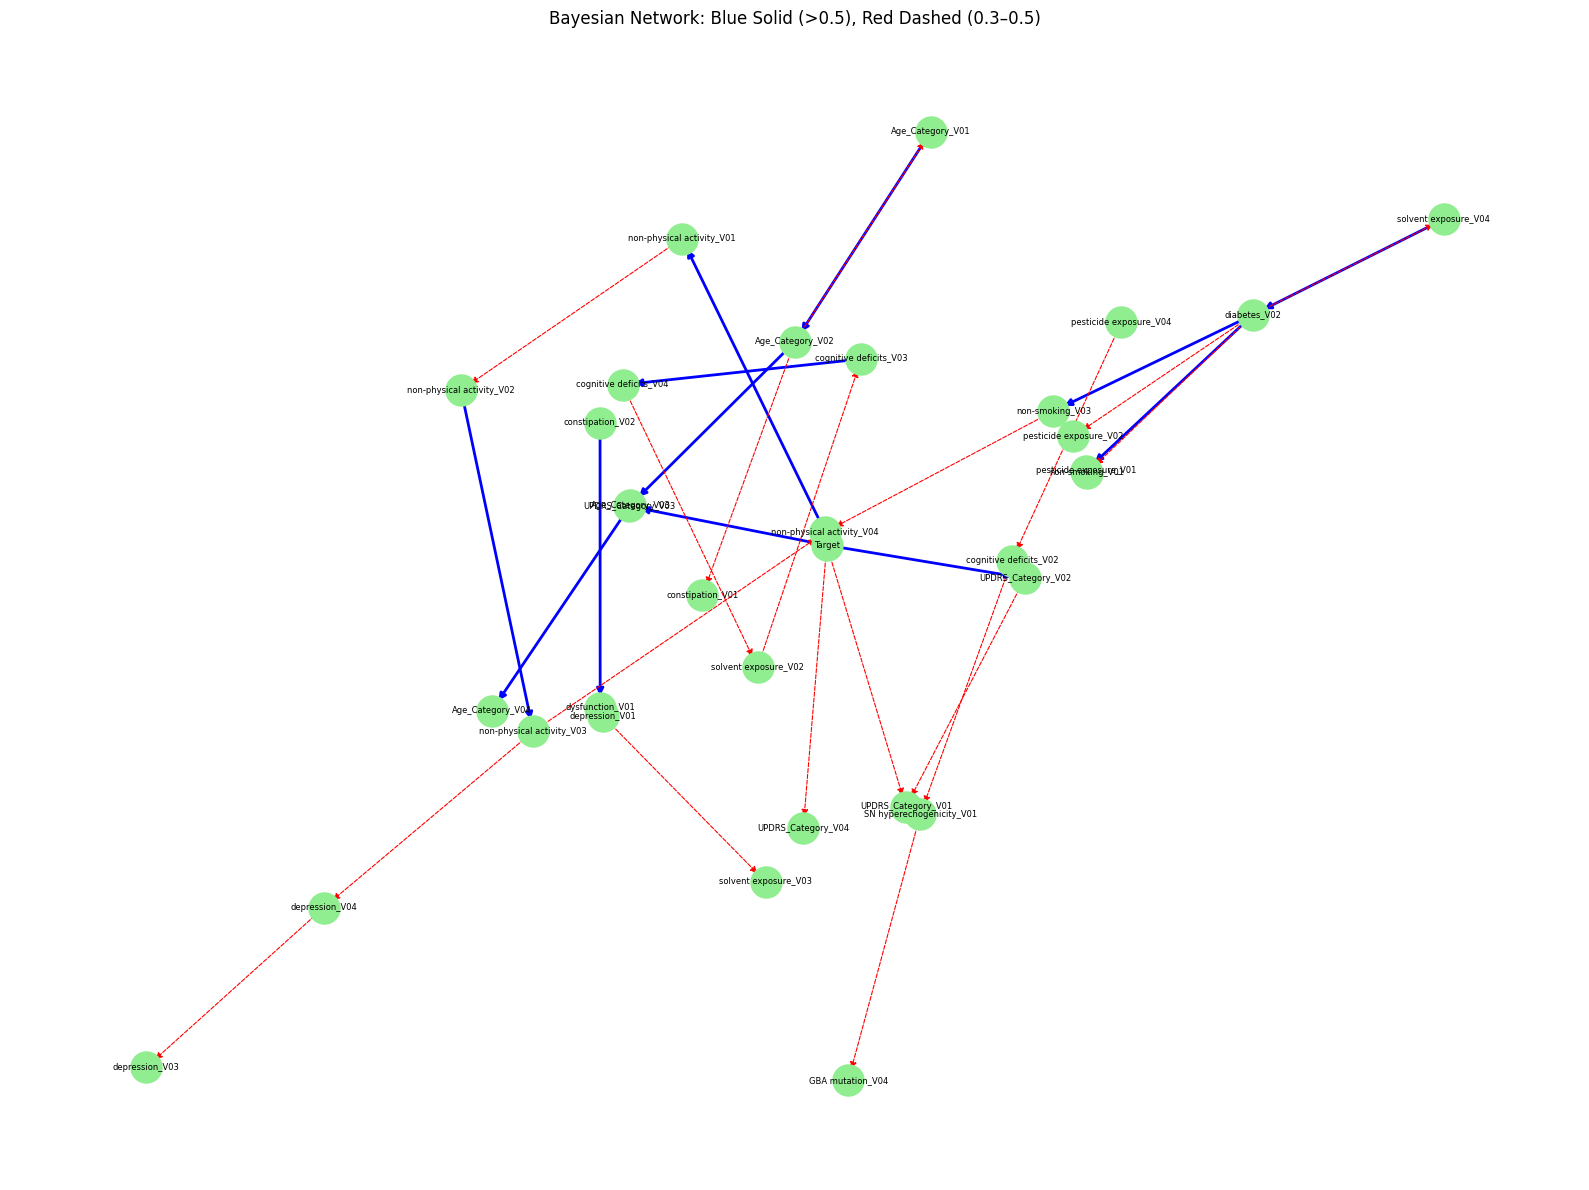

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Thresholds ---
solid_threshold = 0.5
dashed_threshold = 0.3

# --- Categorize edges ---
edges_solid = [edge for edge, count in edges_count.items() if count / bootstrap_samples > solid_threshold]
edges_dashed = [edge for edge, count in edges_count.items() if dashed_threshold <= count / bootstrap_samples <= solid_threshold]

# --- Build graph ---
G = nx.DiGraph()
G.add_edges_from(edges_solid + edges_dashed)

# --- Layout ---
pos = nx.kamada_kawai_layout(G)

# --- Plot ---
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=6)

# Solid edges: > 0.5
nx.draw_networkx_edges(G, pos, edgelist=edges_solid, edge_color='blue', width=2)

# Dashed edges: 0.3 to 0.5
nx.draw_networkx_edges(G, pos, edgelist=edges_dashed, edge_color='red', style='dashed', width=0.8)

plt.title("Bayesian Network: Blue Solid (>0.5), Red Dashed (0.3–0.5)", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()


In [44]:
# Filter edges that appear in at least 50% of bootstrap samples
final_edges = [edge for edge, count in edges_count.items() if count / bootstrap_samples >= 0.5]
bn_final = BayesianNetwork(final_edges)

In [45]:
print("Nodes in Bayesian Network:", bn_final.nodes())


Nodes in Bayesian Network: ['Target', 'UPDRS_Category_V02', 'solvent exposure_V04', 'diabetes_V02', 'non-smoking_V03', 'non-physical activity_V02', 'non-physical activity_V03', 'non-physical activity_V04', 'non-physical activity_V01', 'cognitive deficits_V03', 'cognitive deficits_V04', 'Age_Category_V01', 'Age_Category_V02', 'Age_Category_V03', 'Age_Category_V04', 'UPDRS_Category_V03', 'constipation_V02', 'dysfunction_V01', 'pesticide exposure_V01']


In [46]:
print("Edges in Bayesian Network:", bn_final.edges())


Edges in Bayesian Network: [('Target', 'UPDRS_Category_V02'), ('Target', 'UPDRS_Category_V03'), ('solvent exposure_V04', 'diabetes_V02'), ('diabetes_V02', 'non-smoking_V03'), ('diabetes_V02', 'pesticide exposure_V01'), ('non-physical activity_V02', 'non-physical activity_V03'), ('non-physical activity_V04', 'non-physical activity_V01'), ('cognitive deficits_V03', 'cognitive deficits_V04'), ('Age_Category_V01', 'Age_Category_V02'), ('Age_Category_V02', 'Age_Category_V03'), ('Age_Category_V03', 'Age_Category_V04'), ('constipation_V02', 'dysfunction_V01')]


In [47]:
bn_final.fit(data, estimator=MaximumLikelihoodEstimator)


In [48]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
log_likelihoods = []


In [49]:
from pgmpy.estimators import BayesianEstimator

for train_index, test_index in kf.split(data):
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]

    bn_final.remove_cpds(*bn_final.get_cpds())

    # train BN
    bn_final.fit(data_train, estimator=BayesianEstimator, prior_type="dirichlet", pseudo_counts=1)

    
    # print (CPDs)
    for cpd in bn_final.get_cpds():
        print(f"\n CPD for {cpd.variable}:\n{cpd}")



 CPD for Target:
+-----------+----------+
| Target(0) | 0.371429 |
+-----------+----------+
| Target(2) | 0.628571 |
+-----------+----------+

 CPD for UPDRS_Category_V02:
+-----------------------+----------------------+---------------------+
| Target                | Target(0)            | Target(2)           |
+-----------------------+----------------------+---------------------+
| UPDRS_Category_V02(0) | 0.967741935483871    | 0.00641025641025641 |
+-----------------------+----------------------+---------------------+
| UPDRS_Category_V02(1) | 0.021505376344086023 | 0.01282051282051282 |
+-----------------------+----------------------+---------------------+
| UPDRS_Category_V02(2) | 0.010752688172043012 | 0.9807692307692307  |
+-----------------------+----------------------+---------------------+

 CPD for solvent exposure_V04:
+-------------------------+----------+
| solvent exposure_V04(0) | 0.489796 |
+-------------------------+----------+
| solvent exposure_V04(1) | 0.510204 |


In [50]:
import warnings
import logging
import matplotlib

warnings.filterwarnings("ignore", module='matplotlib.category')
logging.getLogger('matplotlib.category').setLevel(logging.ERROR)


In [51]:
for cpd in bn_final.get_cpds():
    print(f"{cpd.variable} states: {cpd.state_names[cpd.variable]}")


Target states: [0, 2]
UPDRS_Category_V02 states: [0, 1, 2]
solvent exposure_V04 states: [0, 1]
diabetes_V02 states: [0, 1]
non-smoking_V03 states: [0, 1]
non-physical activity_V02 states: [0, 1]
non-physical activity_V03 states: [0, 1]
non-physical activity_V04 states: [0, 1]
non-physical activity_V01 states: [0, 1]
cognitive deficits_V03 states: [0, 1]
cognitive deficits_V04 states: [0, 1]
Age_Category_V01 states: [0, 1]
Age_Category_V02 states: [0, 1]
Age_Category_V03 states: [0, 1]
Age_Category_V04 states: [0, 1]
UPDRS_Category_V03 states: [0, 1, 2]
constipation_V02 states: [0, 1, 2]
dysfunction_V01 states: [0, 1, 2]
pesticide exposure_V01 states: [0, 1]



 CPD of Target (shape: (2, 1)):


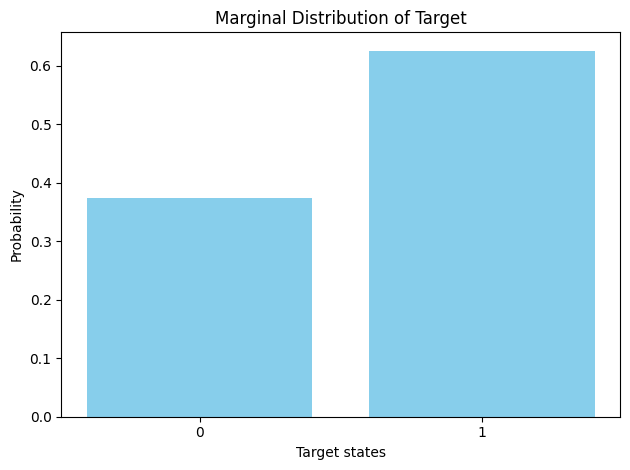


 CPD of UPDRS_Category_V02 (shape: (3, 2)):


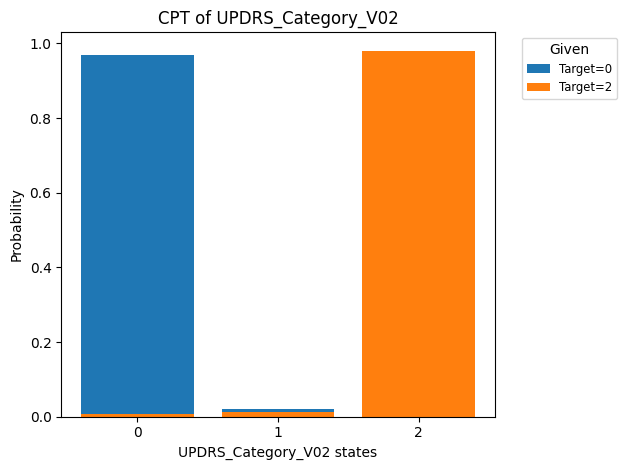


 CPD of solvent exposure_V04 (shape: (2, 1)):


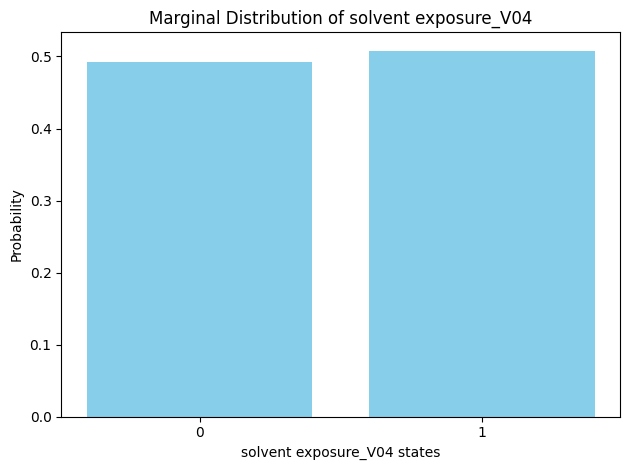


 CPD of diabetes_V02 (shape: (2, 2)):


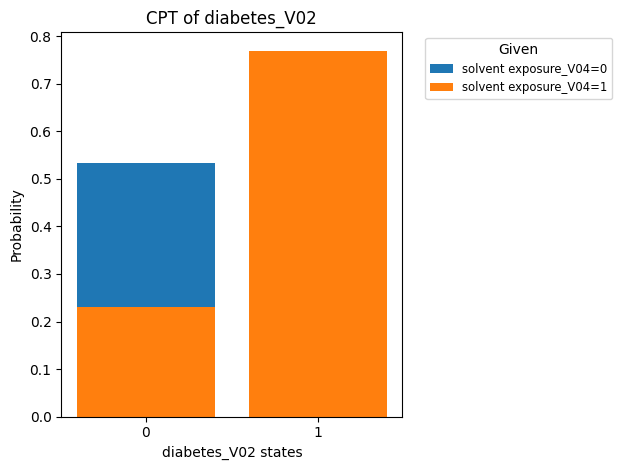


 CPD of non-smoking_V03 (shape: (2, 2)):


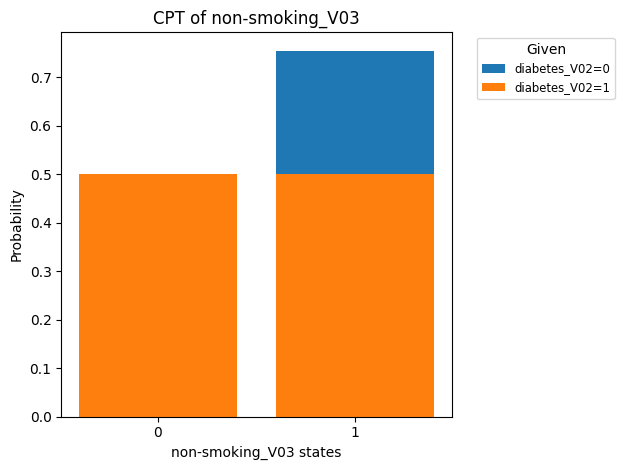


 CPD of non-physical activity_V02 (shape: (2, 1)):


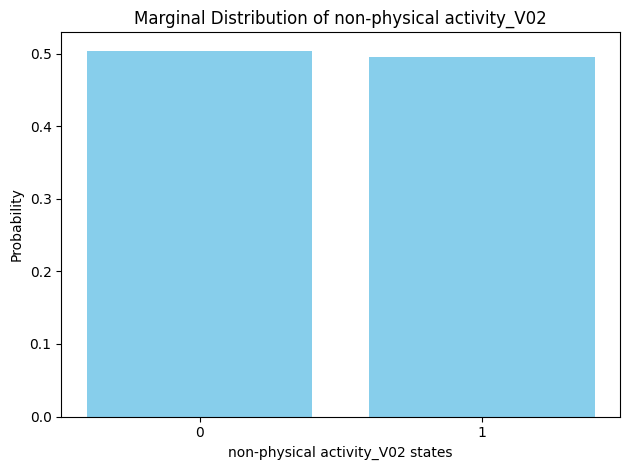


 CPD of non-physical activity_V03 (shape: (2, 2)):


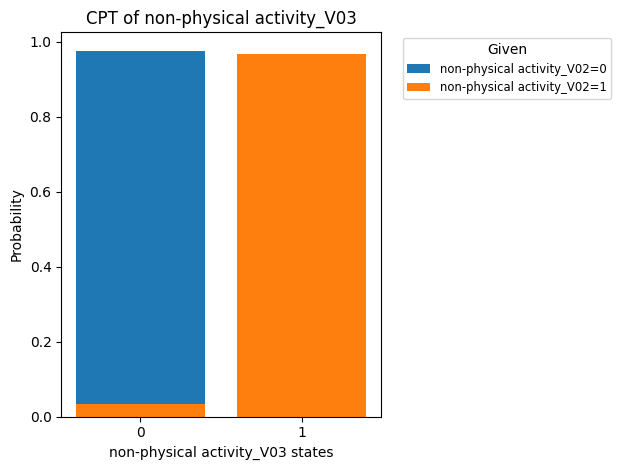


 CPD of non-physical activity_V04 (shape: (2, 1)):


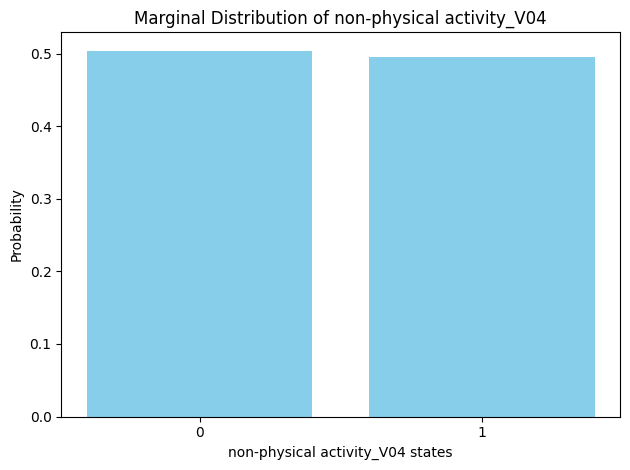


 CPD of non-physical activity_V01 (shape: (2, 2)):


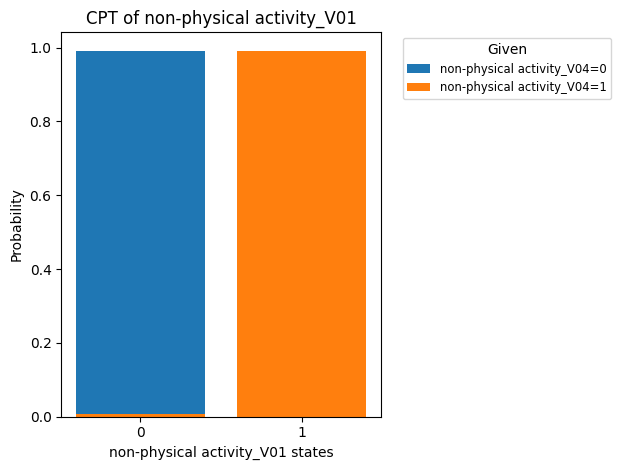


 CPD of cognitive deficits_V03 (shape: (2, 1)):


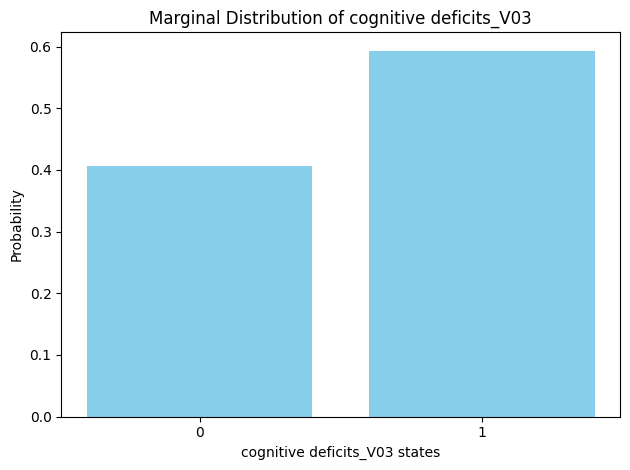


 CPD of cognitive deficits_V04 (shape: (2, 2)):


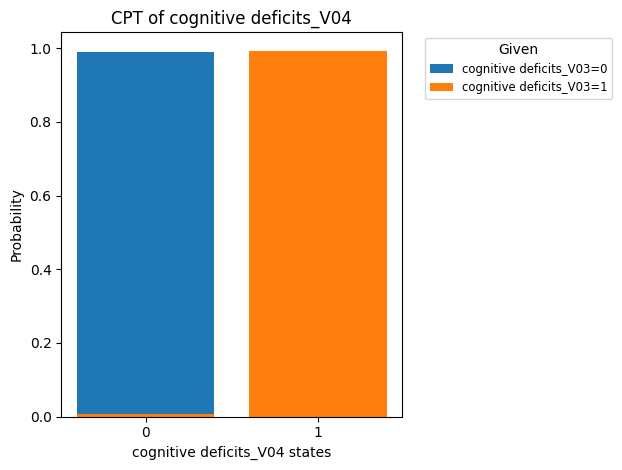


 CPD of Age_Category_V01 (shape: (2, 1)):


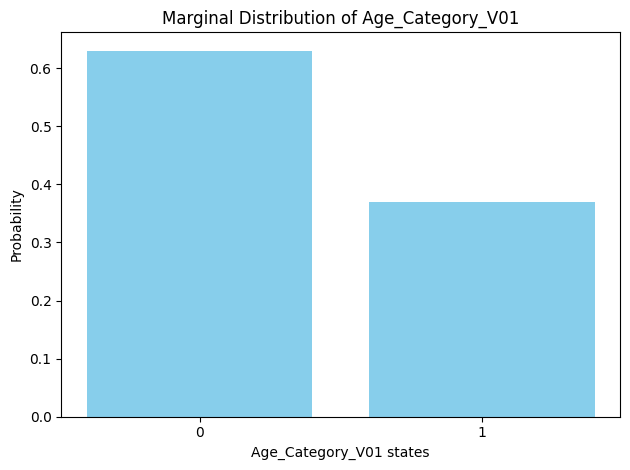


 CPD of Age_Category_V02 (shape: (2, 2)):


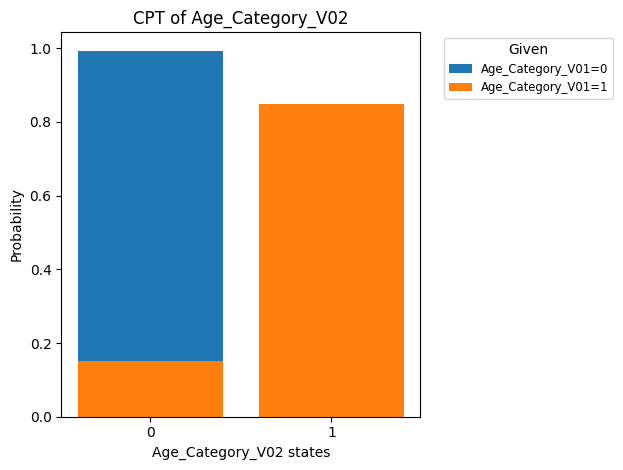


 CPD of Age_Category_V03 (shape: (2, 2)):


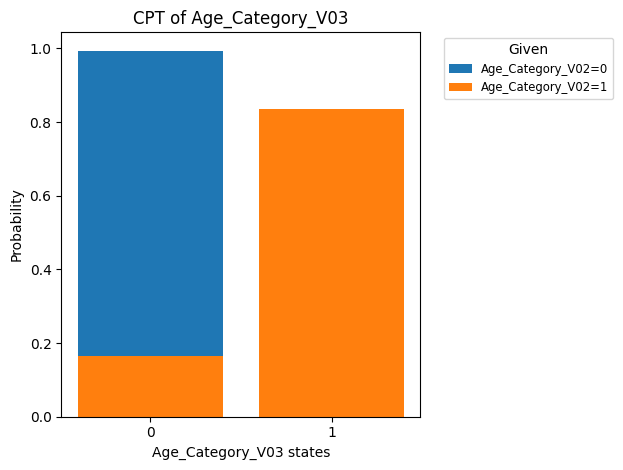


 CPD of Age_Category_V04 (shape: (2, 2)):


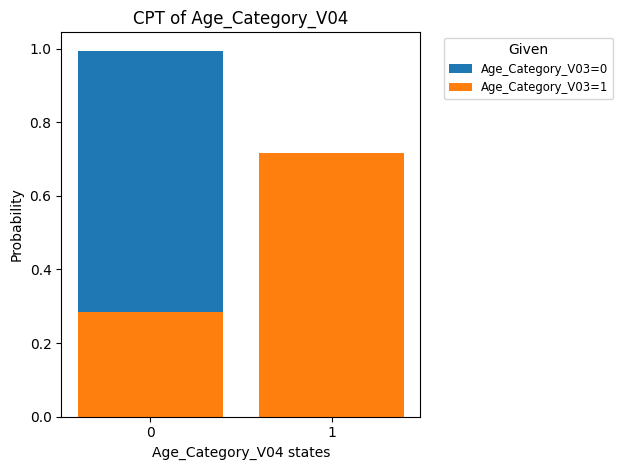


 CPD of UPDRS_Category_V03 (shape: (3, 2)):


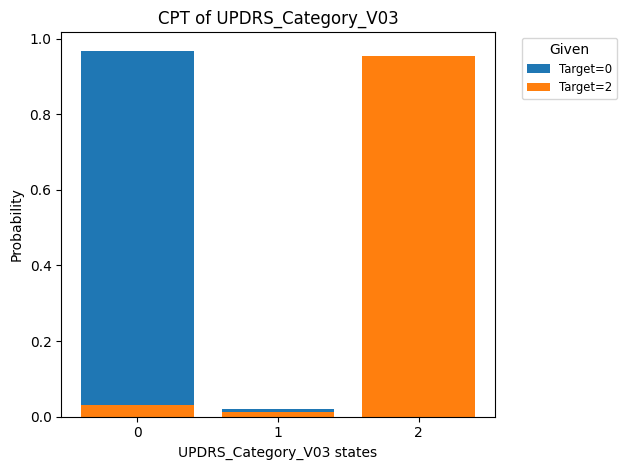


 CPD of constipation_V02 (shape: (3, 1)):


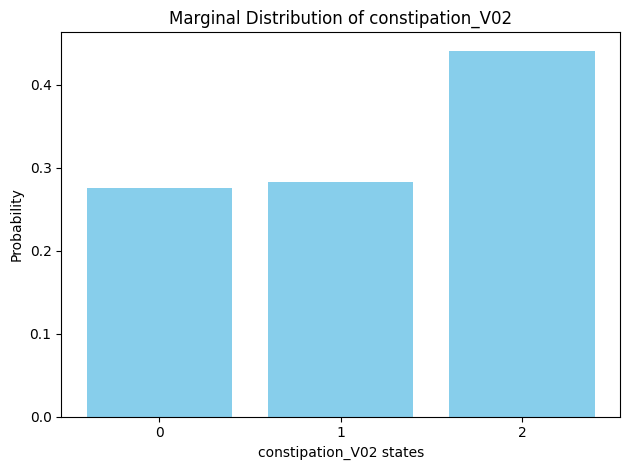


 CPD of dysfunction_V01 (shape: (3, 3)):


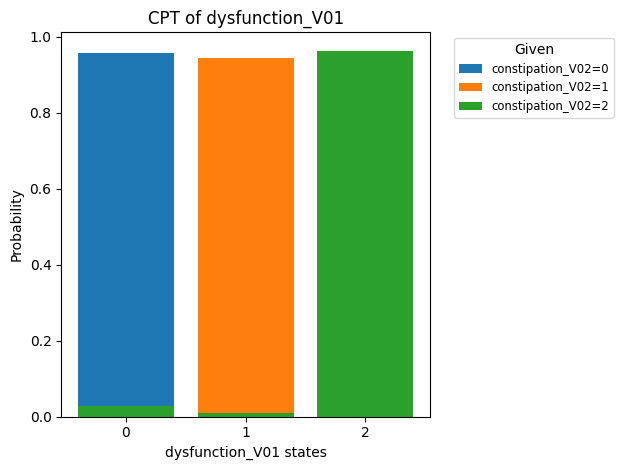


 CPD of pesticide exposure_V01 (shape: (2, 2)):


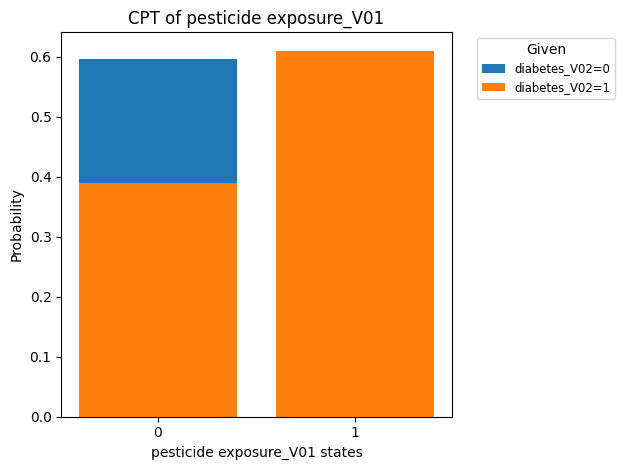

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib.category')

for cpd in bn_final.get_cpds():
    variable = cpd.variable
    state_names = cpd.state_names
    values = cpd.get_values()

    print(f"\n CPD of {variable} (shape: {values.shape}):")

    # no parents (marginal)
    if len(cpd.variables) == 1:
        probs = values.flatten()
        x_labels = [str(i) for i in range(len(probs))]
        plt.bar(x_labels, probs, color='skyblue')
        plt.title(f'Marginal Distribution of {variable}')
        plt.xlabel(f'{variable} states')
        plt.ylabel('Probability')
        plt.tight_layout()
        plt.show()

    # has parents (conditional)
    else:
        parents = cpd.variables[1:]
        parent_cardinalities = [cpd.cardinality[cpd.variables.index(p)] for p in parents]
        parent_combinations = np.array(np.meshgrid(*[range(card) for card in parent_cardinalities])).T.reshape(-1, len(parents))

        for idx, parent_vals in enumerate(parent_combinations):
            prob_vector = values[:, idx]
            label = ', '.join([f'{p}={cpd.state_names[p][v]}' for p, v in zip(parents, parent_vals)])
            x_labels = [str(i) for i in range(len(prob_vector))]
            plt.bar(x_labels, prob_vector, label=label)

        plt.title(f'CPT of {variable}')
        plt.xlabel(f'{variable} states')
        plt.ylabel('Probability')
        plt.legend(title='Given', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


In [53]:
for var in bn_final.nodes():
    print(f"\n Valid States for {var} in BN:")
    print(bn_final.get_cpds(var))



 Valid States for Target in BN:
+-----------+----------+
| Target(0) | 0.373984 |
+-----------+----------+
| Target(2) | 0.626016 |
+-----------+----------+

 Valid States for UPDRS_Category_V02 in BN:
+-----------------------+----------------------+---------------------+
| Target                | Target(0)            | Target(2)           |
+-----------------------+----------------------+---------------------+
| UPDRS_Category_V02(0) | 0.9680851063829787   | 0.00641025641025641 |
+-----------------------+----------------------+---------------------+
| UPDRS_Category_V02(1) | 0.02127659574468085  | 0.01282051282051282 |
+-----------------------+----------------------+---------------------+
| UPDRS_Category_V02(2) | 0.010638297872340425 | 0.9807692307692307  |
+-----------------------+----------------------+---------------------+

 Valid States for solvent exposure_V04 in BN:
+-------------------------+---------+
| solvent exposure_V04(0) | 0.49187 |
+-------------------------+--------

In [54]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(bn_final)


In [55]:


for _, row in data_test.iterrows():
    evidence = row.drop(["Target", "ID"]).to_dict()
    valid_evidence = {k: v for k, v in evidence.items() if k in bn_final.nodes()}
    
    # perform inference
    query_result = infer.query(variables=["Target"], evidence=valid_evidence)

    target_value = row["Target"]
    if target_value in query_result.state_names["Target"]:
        target_index = query_result.state_names["Target"].index(target_value)
        prob = query_result.values[target_index]
    else:
        print(f" Target value {target_value} not found in state names!")
        prob = 0  # to avoid indexing error

    #  log probability
    log_likelihood = np.log(prob) if prob > 0 else float('-inf')
    log_likelihoods.append(log_likelihood)


In [56]:
print("\n Cross-Validation Negative Log-Likelihood Scores:")
print(log_likelihoods)
print("\n Average Negative Log-Likelihood:", np.mean(log_likelihoods))



 Cross-Validation Negative Log-Likelihood Scores:
[-0.00036689935650254473, -0.00036689935650254473, -0.00036689935650254473, -0.00036689935650254473, -0.00036689935650254473, -0.00036689935650254473, -0.00036689935650254473, -0.00036689935650254473, -0.17875052933998428, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05, -7.21717481262146e-05]

 Average Negative Log-Likelihood: -0.006777215394750981


In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RepeatedKFold
from pgmpy.sampling import BayesianModelSampling

In [58]:
# generate synthetic data
sampler = BayesianModelSampling(bn_final)
synthetic_data = sampler.forward_sample(size=len(data), show_progress=False)

print(synthetic_data.head())

   Target  UPDRS_Category_V02  solvent exposure_V04  diabetes_V02  \
0       0                   0                     1             1   
1       2                   2                     1             1   
2       2                   2                     0             1   
3       2                   2                     1             1   
4       0                   0                     1             1   

   non-smoking_V03  non-physical activity_V02  non-physical activity_V03  \
0                1                          0                          0   
1                0                          0                          0   
2                0                          1                          1   
3                0                          0                          0   
4                0                          0                          0   

   non-physical activity_V04  non-physical activity_V01  \
0                          1                          1   
1         

In [59]:

synthetic_cols = list(synthetic_data.columns)
real_data_subset = data[synthetic_cols].copy()


In [60]:
print(synthetic_cols)

['Target', 'UPDRS_Category_V02', 'solvent exposure_V04', 'diabetes_V02', 'non-smoking_V03', 'non-physical activity_V02', 'non-physical activity_V03', 'non-physical activity_V04', 'non-physical activity_V01', 'cognitive deficits_V03', 'cognitive deficits_V04', 'Age_Category_V01', 'Age_Category_V02', 'Age_Category_V03', 'Age_Category_V04', 'UPDRS_Category_V03', 'constipation_V02', 'dysfunction_V01', 'pesticide exposure_V01']


In [61]:
from scipy.stats import entropy

def kl_divergence(p, q):
    p = p / p.sum()
    q = q / q.sum()
    return entropy(p, q)

#comparison for 'Target'
real_dist = real_data_subset['Target'].value_counts(normalize=True).sort_index()
synth_dist = synthetic_data['Target'].value_counts(normalize=True).sort_index()

synth_dist = synth_dist.reindex(real_dist.index, fill_value=1e-6)

kl = kl_divergence(real_dist, synth_dist)
print(f"KL Divergence for 'Target': {kl:.4f}")

KL Divergence for 'Target': 0.0029


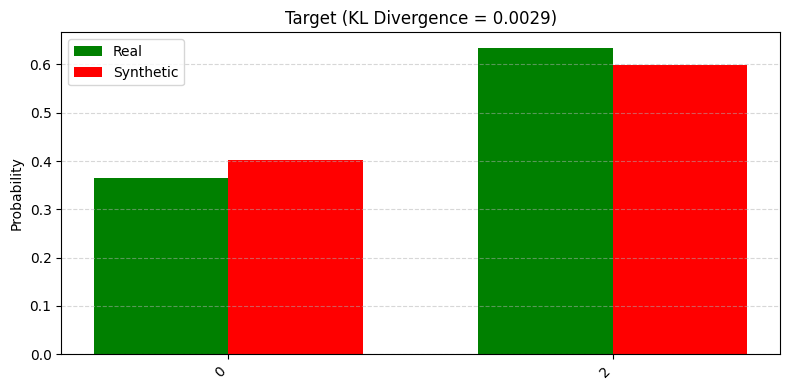

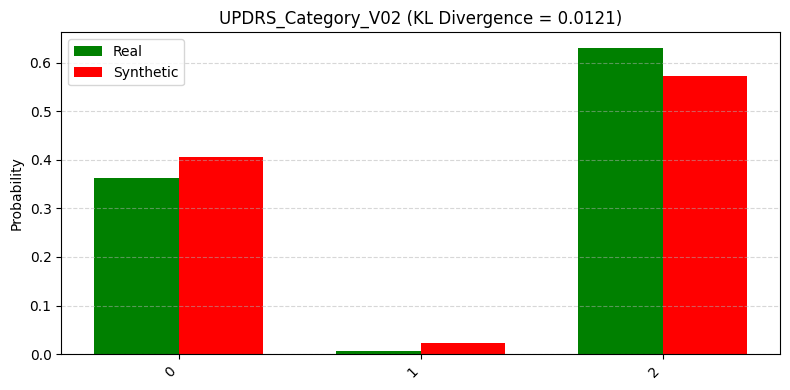

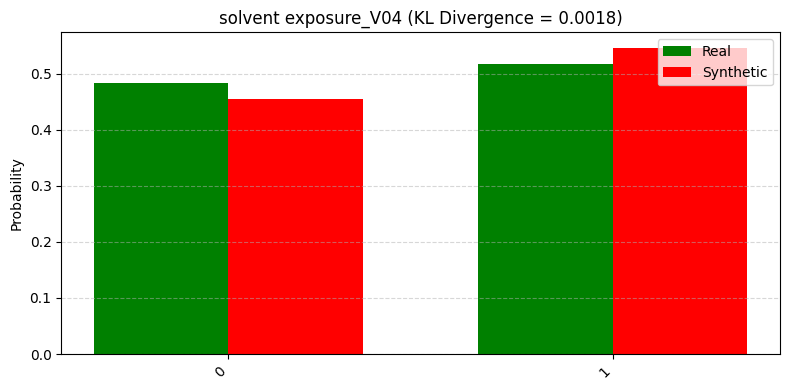

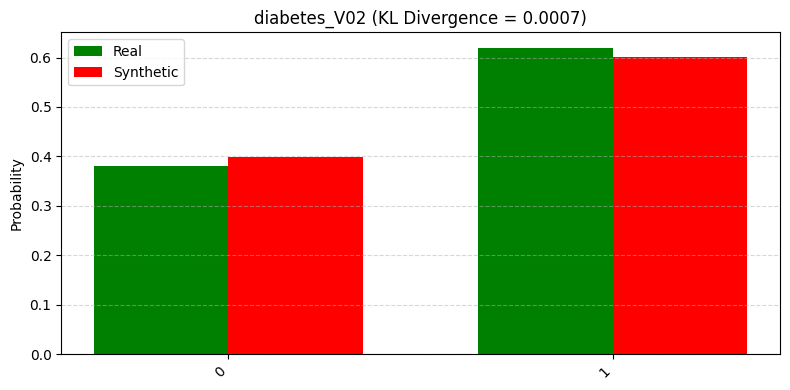

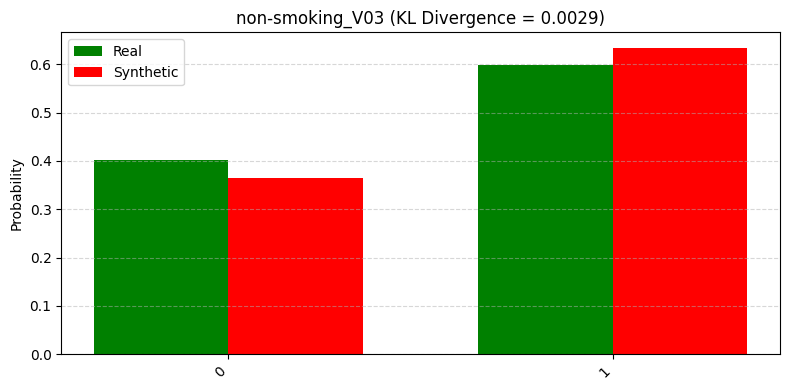

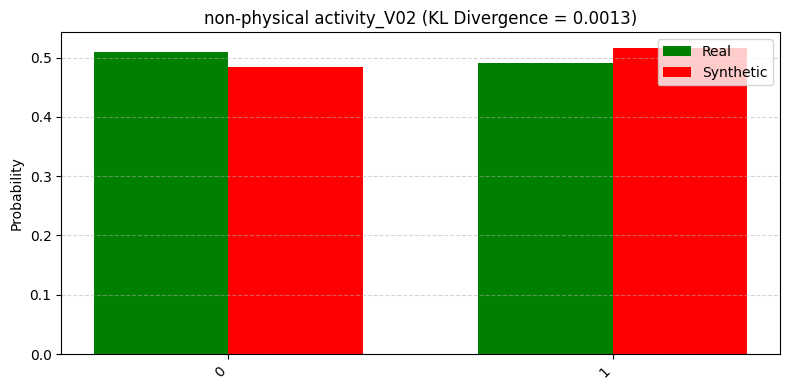

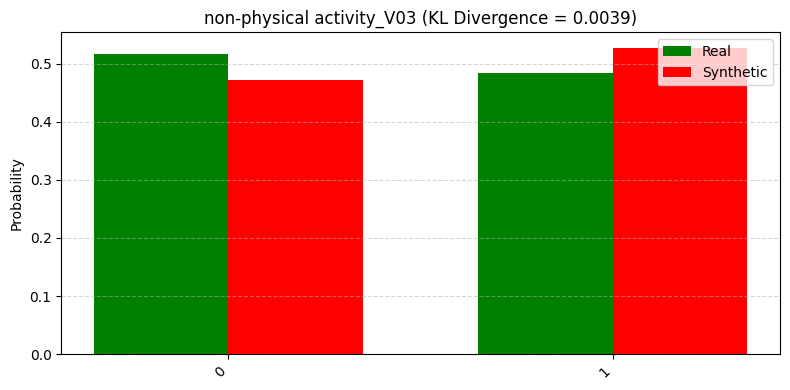

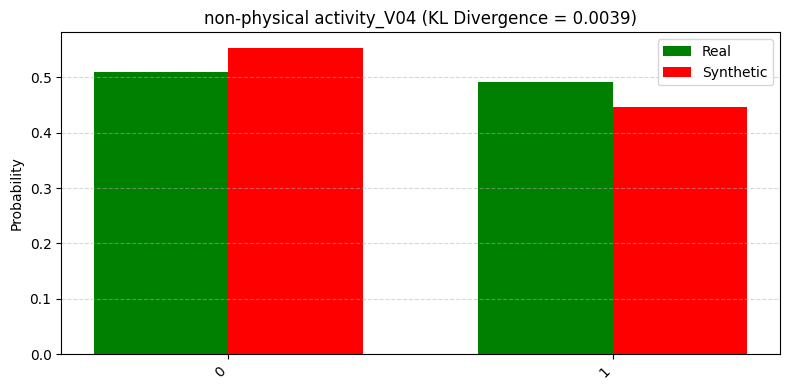

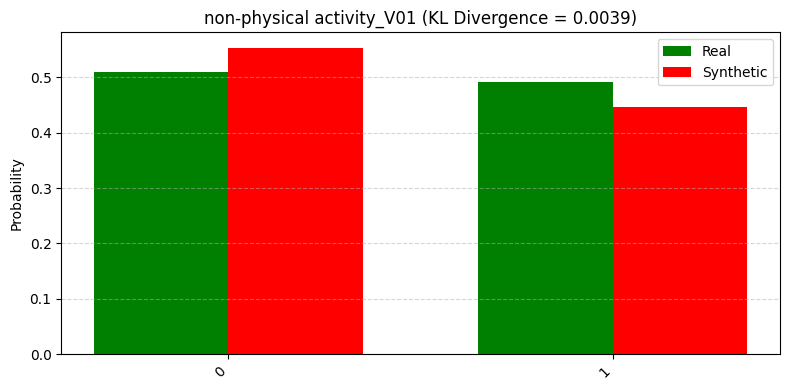

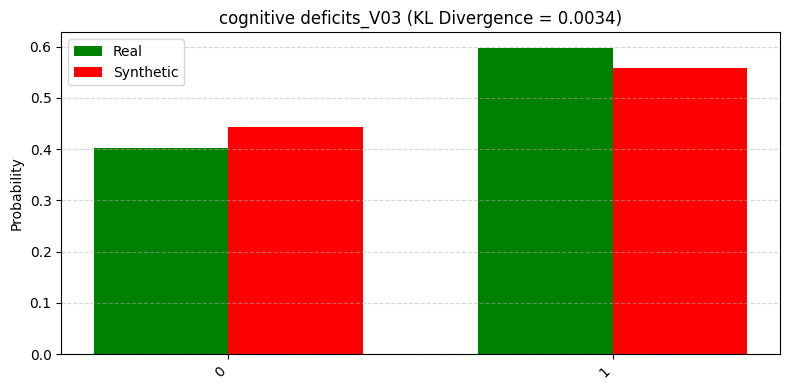

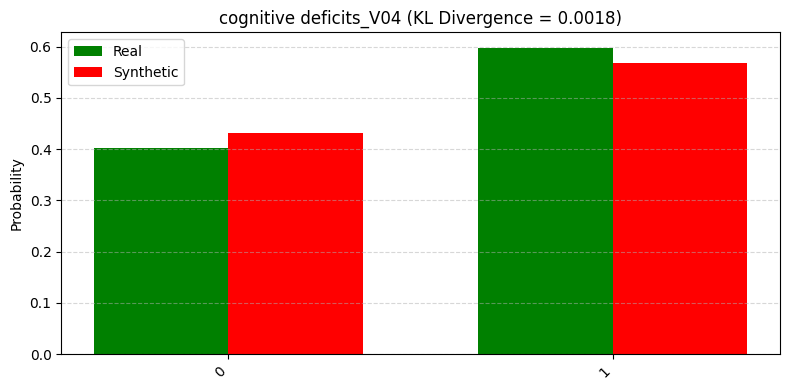

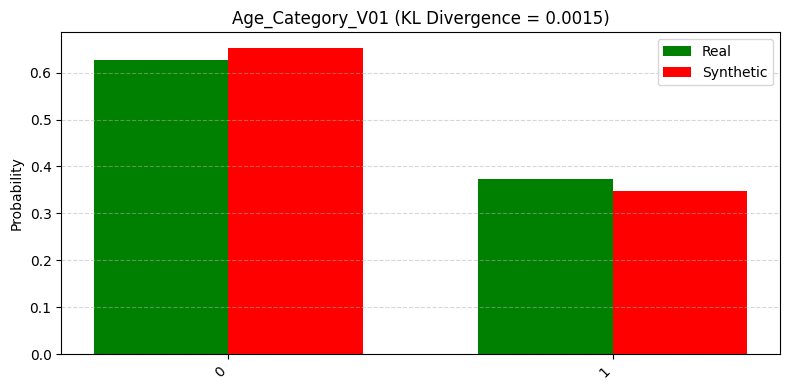

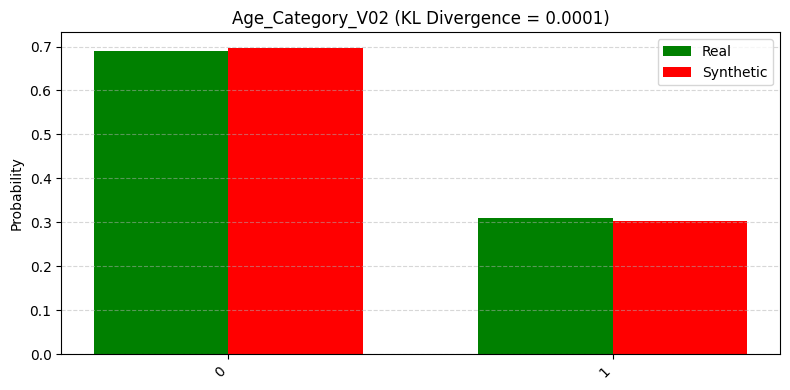

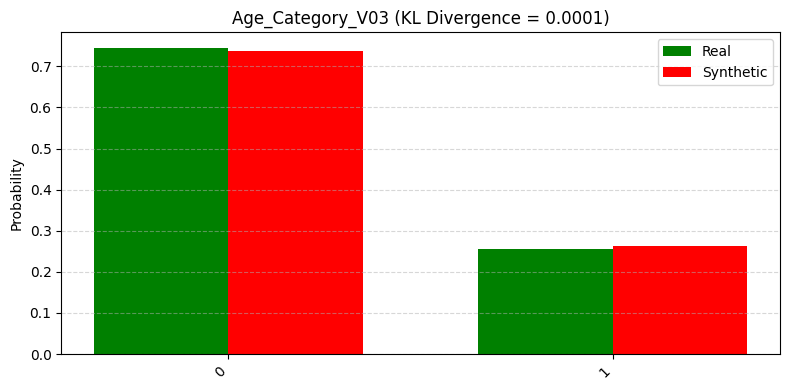

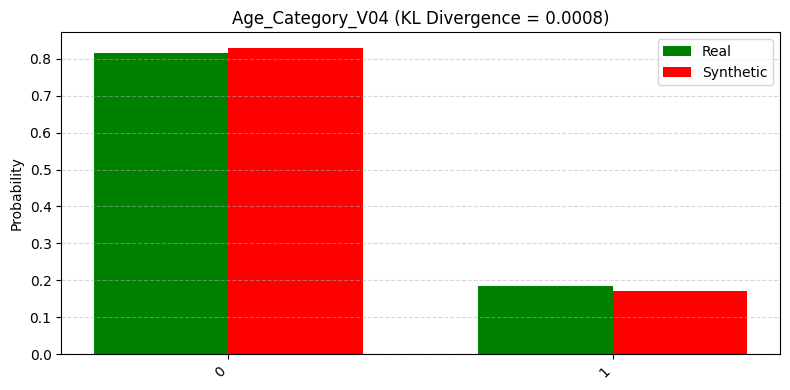

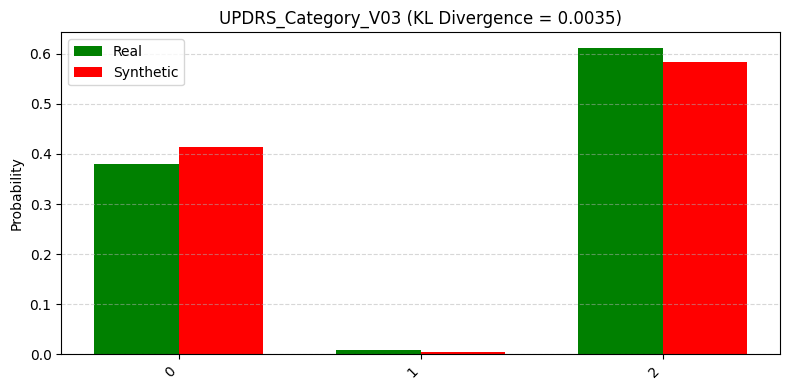

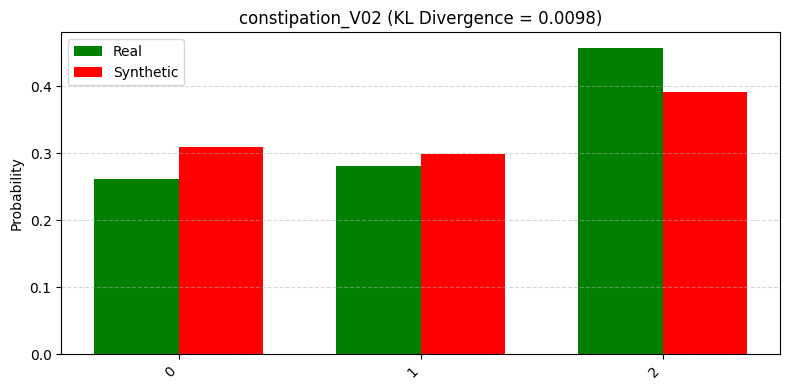

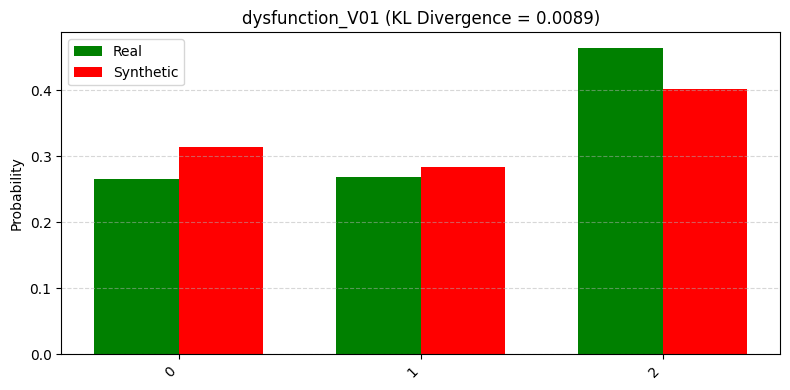

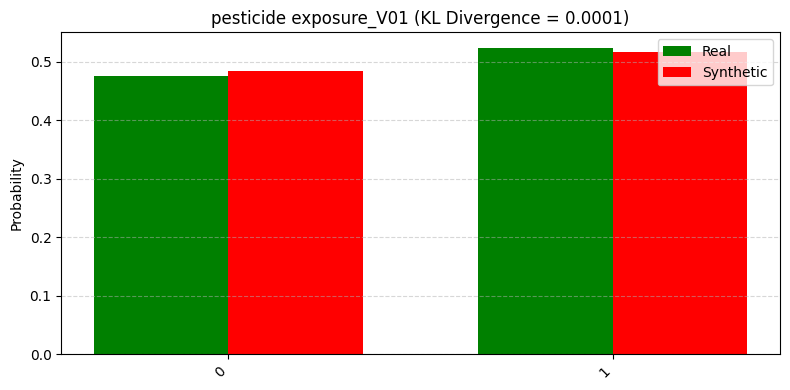

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

def kl_divergence(p, q):
    p = p / p.sum()
    q = q / q.sum()
    return entropy(p, q)

for column in synthetic_data.columns:
    if column in real_data_subset.columns:
        real_dist = real_data_subset[column].value_counts(normalize=True).sort_index()
        synth_dist = synthetic_data[column].value_counts(normalize=True).sort_index()
        all_categories = sorted(set(real_dist.index).union(set(synth_dist.index)))
        real_dist = real_dist.reindex(all_categories, fill_value=0)
        synth_dist = synth_dist.reindex(all_categories, fill_value=0)

        # KL Divergence
        kl = kl_divergence(real_dist, synth_dist)

        # Plot
        x = np.arange(len(all_categories))
        width = 0.35

        plt.figure(figsize=(8, 4))
        plt.bar(x - width/2, real_dist, width, label='Real', color='green')
        plt.bar(x + width/2, synth_dist, width, label='Synthetic', color='red')
        plt.xticks(x, all_categories, rotation=45, ha='right')

        plt.title(f"{column} (KL Divergence = {kl:.4f})")
        plt.ylabel('Probability')
        plt.legend()
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.show()


In [63]:

!pip install scikit-learn numpy pandas matplotlib --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc


In [65]:
real_data_subset['label'] = 1
synthetic_data['label'] = 0

# Combine datasets
combined_data = pd.concat([real_data_subset, synthetic_data], ignore_index=True)
X = combined_data.drop(columns=['label'])
y = combined_data['label']


Mean pAUC (TPR ≥ 99%): 12.94%


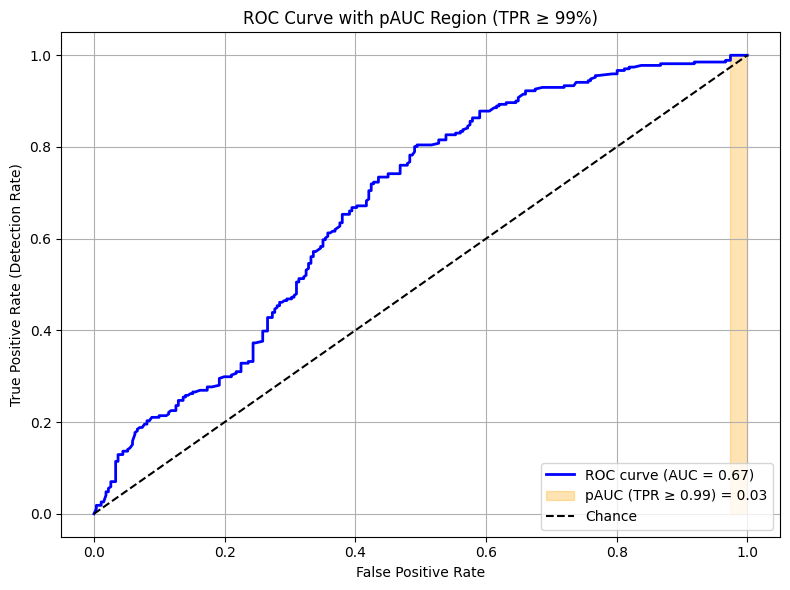

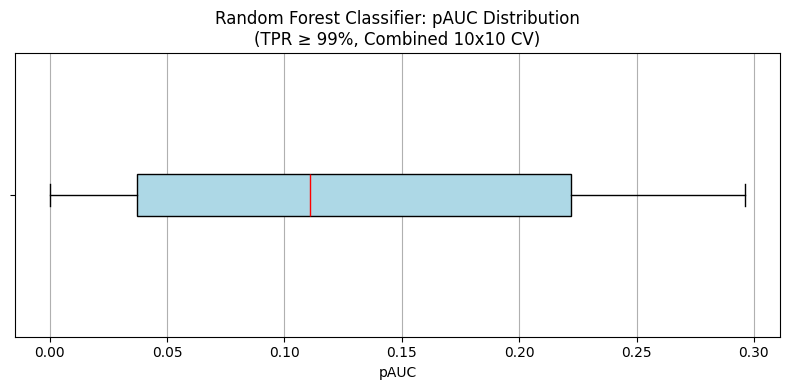


We used the partial area under ROC curve (pAUC) at a pre-specified true positive rate of 99% for real subjects as a measure of the prediction performance.
The area under the ROC curve at which the detection rate for real subjects was between 99% and 100% served as an indicator of the validity of the synthetic TREND participants.


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

#parameters
detection_rate_threshold = 0.99
n_splits = 10
n_repeats = 10
random_state = 42

rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

pauc_scores = []
all_true = []
all_proba = []

for repeat in range(n_repeats):
    fold_pauc_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf.fit(X_train, y_train)
        y_prob = rf.predict_proba(X_test)[:, 1]

        all_true.extend(y_test)
        all_proba.extend(y_prob)

        fpr, tpr, _ = roc_curve(y_test, y_prob)

        # pAUC region where TPR ≥ 99%
        mask = tpr >= detection_rate_threshold
        fpr_high = fpr[mask]
        tpr_high = tpr[mask]

        if len(fpr_high) >= 2:
            pAUC = auc(fpr_high, tpr_high)
        else:
            pAUC = 0

        fold_pauc_scores.append(pAUC)
    
    pauc_scores.append(fold_pauc_scores)

# convert to percentage
mean_pAUC = np.mean([np.mean(r) for r in pauc_scores]) * 100
print(f"Mean pAUC (TPR ≥ 99%): {mean_pAUC:.2f}%")

# ROC Curve
fpr, tpr, _ = roc_curve(all_true, all_proba)
roc_auc = auc(fpr, tpr)

# pAUC region 
mask = tpr >= detection_rate_threshold
fpr_pauc = fpr[mask]
tpr_pauc = tpr[mask]
pauc_combined = auc(fpr_pauc, tpr_pauc) if len(fpr_pauc) >= 2 else 0

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.fill_between(fpr_pauc, tpr_pauc, alpha=0.3, color='orange',
                 label=f'pAUC (TPR ≥ 0.99) = {pauc_combined:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.title('ROC Curve with pAUC Region (TPR ≥ 99%)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Detection Rate)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#Horizontal Boxplot
all_pauc_scores = [score for repeat in pauc_scores for score in repeat]

plt.figure(figsize=(8, 4))
plt.boxplot(all_pauc_scores, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))

plt.title('Random Forest Classifier: pAUC Distribution\n(TPR ≥ 99%, Combined 10x10 CV)')
plt.xlabel('pAUC')
plt.yticks([1], [''])  
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


print("\nWe used the partial area under ROC curve (pAUC) at a pre-specified true positive rate of 99% for real subjects as a measure of the prediction performance.")
print("The area under the ROC curve at which the detection rate for real subjects was between 99% and 100% served as an indicator of the validity of the synthetic TREND participants.")


In [67]:
from sklearn.metrics import roc_auc_score


results = []

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

real_df = real_data_subset.copy()
synth_df = synthetic_data.copy()

markers = [
    'UPDRS_Category_V02',
    'UPDRS_Category_V03',
    'constipation_V02',
    'dysfunction_V01',
    'cognitive deficits_V04'
]

def get_visit(col_name):
    if '_V0' in col_name:
        return int(col_name.split('_V0')[1])
    return None

for target in markers:
    visit = get_visit(target)
    if visit is None or visit == 1:
        continue

    prev_visit = visit - 1
    prev_visit_str = f'_V0{prev_visit}'

    input_features = [col for col in real_df.columns if prev_visit_str in col and col != target]
    if not input_features:
        print(f"Skipping {target}: no previous visit features found.")
        continue

    print(f"\n Predicting {target} using features from visit {prev_visit}:")

    X_real = real_df[input_features].copy()
    y_real = real_df[target].copy()

    X_synth = synth_df[input_features].copy()
    y_synth = real_df[target].copy()

   
    combined = pd.concat([X_real, y_real], axis=1).dropna()
    X_real = combined[input_features]
    y_real = combined[target]

    combined_synth = pd.concat([X_synth, y_synth], axis=1).dropna()
    X_synth = combined_synth[input_features]
    y_synth = combined_synth[target]

    class_counts = y_real.value_counts()
    n_classes = len(class_counts)
    min_class_size = class_counts.min()

    if n_classes < 2 or min_class_size < 10:
        print(f" Skipping {target}: Not enough samples in one of the classes (min count = {min_class_size})")
        continue

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

    auc_scores = []

    for train_idx, test_idx in cv.split(X_real, y_real):
        try:
            clf.fit(X_real.iloc[train_idx], y_real.iloc[train_idx])
            probas = clf.predict_proba(X_real.iloc[test_idx])
            if n_classes == 2:
                auc = roc_auc_score(y_real.iloc[test_idx], probas[:, 1])
            else:
                auc = roc_auc_score(y_real.iloc[test_idx], probas, multi_class='ovr', average='macro')
            auc_scores.append(auc)
        except:
            continue

    if auc_scores:
        print(" Real→Real AUC:", round(np.mean(auc_scores), 3))
    else:
        print(" Real→Real AUC: Not computable (possibly not enough data)")

    # train on synthetic, test on real
    try:
        clf.fit(X_synth, y_synth)
        probas = clf.predict_proba(X_real)
        if n_classes == 2:
            auc_synth_to_real = roc_auc_score(y_real, probas[:, 1])
        else:
            auc_synth_to_real = roc_auc_score(y_real, probas, multi_class='ovr', average='macro')
        print("Synthetic→Real AUC:", round(auc_synth_to_real, 3))
    except:
        print("Synthetic→Real AUC: Could not compute")



 Predicting UPDRS_Category_V02 using features from visit 1:
 Skipping UPDRS_Category_V02: Not enough samples in one of the classes (min count = 2)

 Predicting UPDRS_Category_V03 using features from visit 2:
 Skipping UPDRS_Category_V03: Not enough samples in one of the classes (min count = 2)

 Predicting constipation_V02 using features from visit 1:
 Real→Real AUC: 0.985
Synthetic→Real AUC: 0.519

 Predicting cognitive deficits_V04 using features from visit 3:
 Real→Real AUC: 1.0
Synthetic→Real AUC: 0.535


In [72]:
pip install prince


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


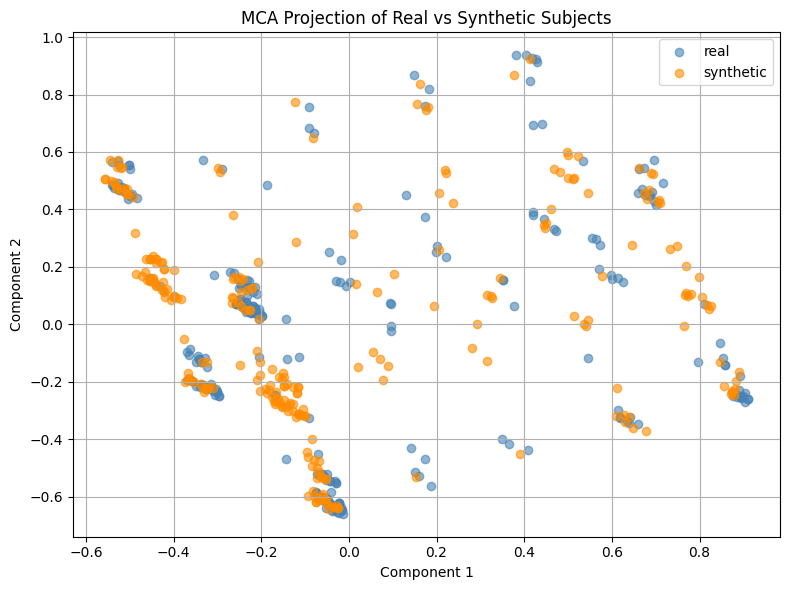

In [74]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

binary_cols = [
    'Age_Category_V01', 'Age_Category_V02', 'Age_Category_V03', 'Age_Category_V04',
    'cognitive deficits_V03', 'cognitive deficits_V04',
    'non-physical activity_V01', 'non-physical activity_V02',
    'non-physical activity_V03', 'non-physical activity_V04',
    'solvent exposure_V04', 'diabetes_V02'
]

ternary_cols = [
   'UPDRS_Category_V02', 'UPDRS_Category_V03',
    'dysfunction_V01', 'constipation_V02'
]

target_col = ['Target']

# mappings
binary_map = {0: 'class_0', 1: 'class_1'}
ternary_map = {0: 'class_0', 1: 'class_1', 2: 'class_2'}
target_map = {0: 'class_0', 2: 'class_2'}

real_data_copy = real_data_subset.copy()
synthetic_data_copy = synthetic_data.copy()

for df in [real_data_copy, synthetic_data_copy]:
    for col in binary_cols:
        df[col] = df[col].map(binary_map)
    for col in ternary_cols:
        df[col] = df[col].map(ternary_map)
    for col in target_col:
        df[col] = df[col].map(target_map)

real_data_copy['source'] = 'real'
synthetic_data_copy['source'] = 'synthetic'

combined_df = pd.concat([real_data_copy, synthetic_data_copy], ignore_index=True)

# apply MCA
mca = prince.MCA(n_components=2, random_state=42)
mca_fit = mca.fit(combined_df.drop(columns=['source']))
mca_coords = mca_fit.transform(combined_df.drop(columns=['source']))

# Plot
plt.figure(figsize=(8, 6))
for label, color in zip(['real', 'synthetic'], ['steelblue', 'darkorange']):
    subset = mca_coords[combined_df['source'] == label]
    plt.scatter(subset[0], subset[1], label=label, alpha=0.6, c=color)

plt.title('MCA Projection of Real vs Synthetic Subjects')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


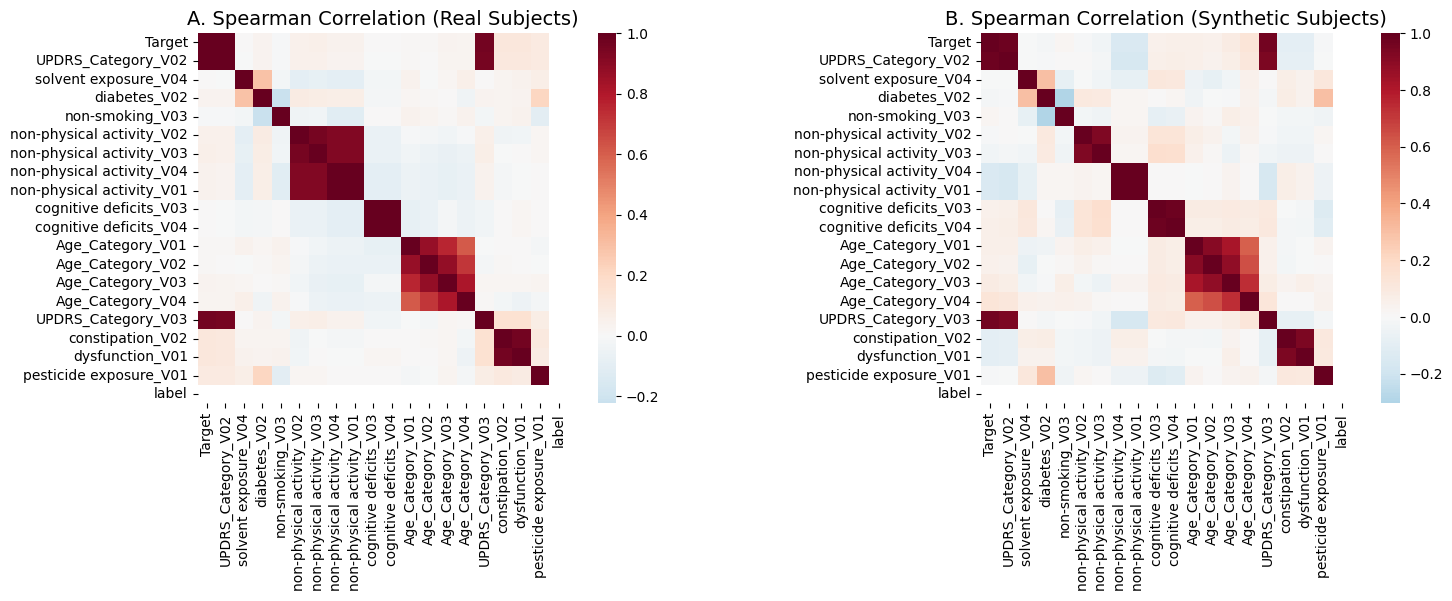

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Spearman correlations
real_corr = real_data_subset.corr(method='spearman')
synth_corr = synthetic_data.corr(method='spearman')
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.heatmap(real_corr, cmap='RdBu_r', center=0, annot=False, fmt=".2f", square=True, cbar=True)
plt.title("A. Spearman Correlation (Real Subjects)", fontsize=14)
plt.subplot(1, 2, 2)
sns.heatmap(synth_corr, cmap='RdBu_r', center=0, annot=False, fmt=".2f", square=True, cbar=True)
plt.title("B. Spearman Correlation (Synthetic Subjects)", fontsize=14)

plt.tight_layout()
plt.show()


In [77]:
import joblib

# Save the trained Bayesian model
joblib.dump(bn_final, "model.pkl")

# Save the data used (real_data_subset is likely what you use for training)
real_data_subset.to_csv("your_dataset.csv", index=False)

print("✅ Model and dataset saved for Streamlit app.")


✅ Model and dataset saved for Streamlit app.


In [78]:
import joblib

# Save the trained Bayesian model
joblib.dump(bn_final, "model1.pkl")

# Save the data used (real_data_subset is likely what you use for training)
data.to_csv("your_dataset1.csv", index=False)

print("✅ Model and dataset saved for Streamlit app.")


✅ Model and dataset saved for Streamlit app.
